In [165]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [166]:
pwd

'C:\\Users\\abhir\\ML PROJECT\\training'

In [167]:
dataset = pd.read_excel('flood dataset.xlsx')

# UNIVARIATE ANALYSIS

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


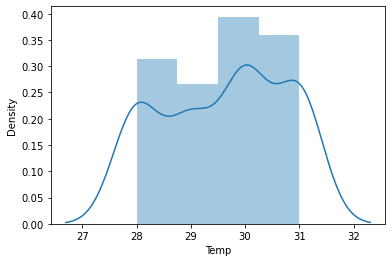

In [168]:
print(sns.distplot(dataset["Temp"]))

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)


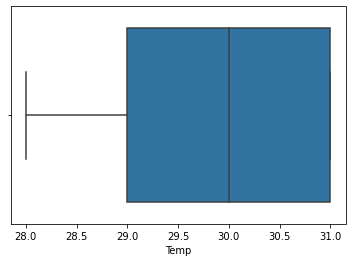

In [169]:
print(sns.boxplot(dataset['Temp']))

# multivariate analysis

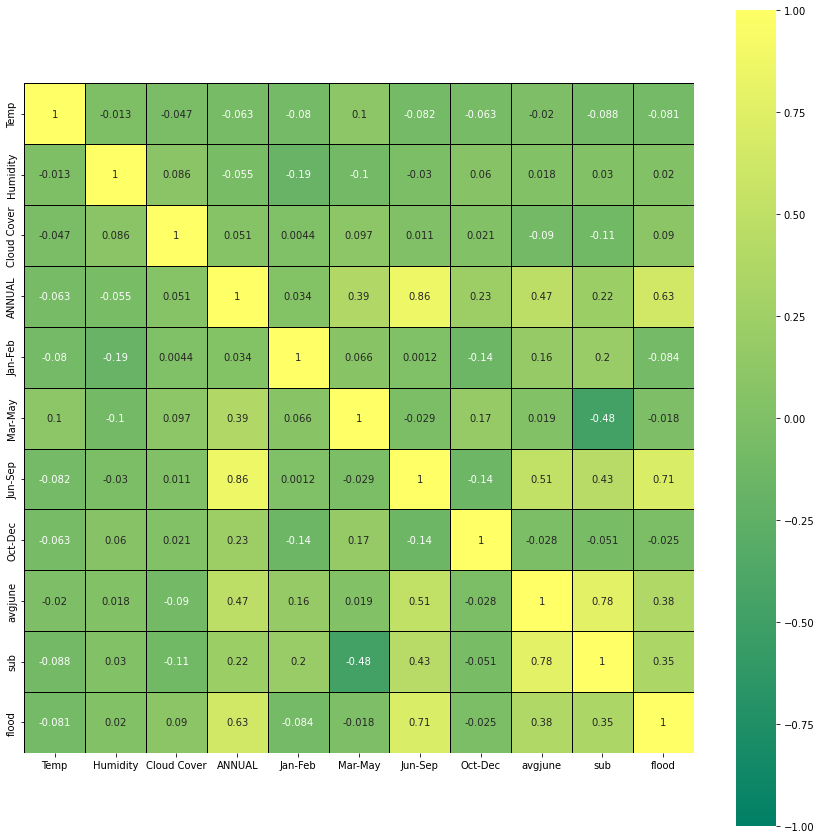

In [170]:
#heat map
import seaborn as sns
fig=plt.gcf()
fig.set_size_inches(15,15)
fig=sns.heatmap(dataset.corr(),annot=True,cmap='summer',
               linewidths=1,linecolor='k',square=True,
               mask=False, vmin=-1, vmax=1,
               cbar_kws={"orientation": "vertical"},cbar=True)

# Descriptive Analysis

In [171]:
dataset.drop(["Oct-Dec"],axis=1,inplace=True)

In [172]:
dataset.head(10)

,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,avgjune,sub,flood
0,29,70,30,3248.6,73.4,386.2,2122.8,274.866667,649.9,0
1,28,75,40,3326.6,9.3,275.7,2403.4,130.300000,256.4,1
2,28,75,42,3271.2,21.7,336.3,2343.0,186.200000,308.9,0
3,29,71,44,3129.7,26.7,339.4,2398.2,366.066667,862.5,0
4,31,74,40,2741.6,23.4,378.5,1881.5,283.400000,586.9,0
5,30,70,38,2708.0,34.1,230.0,1943.1,138.300000,254.1,0
6,29,74,40,3671.1,23.7,328.0,2737.8,256.966667,669.5,1
7,30,78,36,2648.3,28.8,283.7,2023.6,197.533333,450.0,0
8,30,71,40,3050.2,65.9,628.3,1940.4,234.900000,231.5,0
9,30,70,34,2848.6,28.4,296.7,1886.5,226.666667,531.2,0


In [173]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temp         115 non-null    int64  
 1   Humidity     115 non-null    int64  
 2   Cloud Cover  115 non-null    int64  
 3   ANNUAL       115 non-null    float64
 4   Jan-Feb      115 non-null    float64
 5   Mar-May      115 non-null    float64
 6   Jun-Sep      115 non-null    float64
 7   avgjune      115 non-null    float64
 8   sub          115 non-null    float64
 9   flood        115 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 9.1 KB
None


In [174]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Temp,115.0,29.600000,1.122341,28.0,29.000000,30.000000,31.000000,31.000000
Humidity,115.0,73.852174,2.947623,70.0,71.000000,74.000000,76.000000,79.000000
Cloud Cover,115.0,36.286957,4.330158,30.0,32.500000,36.000000,40.000000,44.000000
ANNUAL,115.0,2925.487826,422.112193,2068.8,2627.900000,2937.500000,3164.100000,4257.800000
Jan-Feb,115.0,27.739130,22.361032,0.3,10.250000,20.500000,41.600000,98.100000
Mar-May,115.0,377.253913,151.091850,89.9,276.750000,342.000000,442.300000,915.200000
Jun-Sep,115.0,2022.840870,386.254397,1104.3,1768.850000,1948.700000,2242.900000,3451.300000
avgjune,115.0,218.100870,62.547597,65.6,179.666667,211.033333,263.833333,366.066667
sub,115.0,439.801739,210.438813,34.2,295.000000,430.600000,577.650000,982.700000
flood,115.0,0.139130,0.347597,0.0,0.000000,0.000000,0.000000,1.000000


## Handling the missing values

In [175]:
dataset.isnull().any()

Temp           False
Humidity       False
Cloud Cover    False
ANNUAL         False
Jan-Feb        False
Mar-May        False
Jun-Sep        False
avgjune        False
sub            False
flood          False
dtype: bool

##  splitting the dataset into dependent and independent variables

In [176]:
X = dataset.iloc[:,2:7].values

In [177]:
y = dataset.iloc[:,9:].values

## split the Dataset into Train set and Test set

In [178]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [179]:
X_train.shape

(86, 5)

In [180]:
X_test.shape

(29, 5)

## Feature scaling

In [181]:
#import Standardscaler
from sklearn.preprocessing import StandardScaler
#create object to standardScaler class
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [182]:
from joblib import dump
dump(sc,"transform.save")

['transform.save']

# Evaluating Decision Tree

In [183]:
from sklearn.tree import DecisionTreeClassifier

In [184]:
model = DecisionTreeClassifier()

In [185]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [186]:
from sklearn.metrics import accuracy_score,classification_report

In [187]:
y_predict = model.predict(X_test)
y_predict_train=model.predict(X_train)

# Accuracy score

In [188]:
print('Test data',accuracy_score(y_test,y_predict))
print('Train data',accuracy_score(y_train,y_predict_train))

Test data 0.9655172413793104
Train data 1.0


# Confusion matrix

pd.crosstab(y_test,y_predict)

# Classification report

In [189]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.75      1.00      0.86         3

    accuracy                           0.97        29
   macro avg       0.88      0.98      0.92        29
weighted avg       0.97      0.97      0.97        29



# Random forest model

In [190]:
from sklearn.ensemble import RandomForestClassifier

In [191]:
model = RandomForestClassifier()
model.fit(X_train,y_train.ravel())

RandomForestClassifier()

In [192]:
from sklearn.metrics import accuracy_score,classification_report

In [193]:
y_predict = model.predict(X_test)
y_predict_train=model.predict(X_train)

# Accuracy score

In [194]:
print('Test data',accuracy_score(y_test.ravel(),y_predict))
print('Train data',accuracy_score(y_train.ravel(),y_predict_train))

Test data 0.9655172413793104
Train data 1.0


# Confusion matrix

In [195]:
pd.crosstab(y_test.ravel(),y_predict)

col_0,0,1
row_0,,
0,25,1
1,0,3


# Classification report

In [196]:
print(classification_report(y_test.ravel(), y_predict))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.75      1.00      0.86         3

    accuracy                           0.97        29
   macro avg       0.88      0.98      0.92        29
weighted avg       0.97      0.97      0.97        29



## KNN model

In [197]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(X_train,y_train.ravel())



KNeighborsClassifier()

In [198]:
y_predict=knn.predict(X_test)
y_pred=knn.predict(X_train)

In [200]:
from sklearn.metrics import accuracy_score,classification_report

print("Test accuracy=", accuracy_score(y_test.ravel(),y_predict))
print("Train accuracy=", accuracy_score(y_train.ravel(),y_pred))


Test accuracy= 0.896551724137931
Train accuracy= 0.9418604651162791


In [201]:
pd.crosstab(y_test.ravel(),y_predict)

col_0,0,1
row_0,,
0,23,3
1,0,3


In [202]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        26
           1       0.50      1.00      0.67         3

    accuracy                           0.90        29
   macro avg       0.75      0.94      0.80        29
weighted avg       0.95      0.90      0.91        29



# Xgboost model

In [203]:
from xgboost import XGBClassifier

In [204]:
xgb = XGBClassifier()

In [205]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [206]:
y_predict=xgb.predict(X_test)
y_pred=xgb.predict(X_train)

In [207]:
from sklearn.metrics import accuracy_score,classification_report

print("Test accuracy=", accuracy_score(y_test,y_predict))
print("Train accuracy=", accuracy_score(y_train,y_pred))


Test accuracy= 0.9655172413793104
Train accuracy= 1.0


In [208]:
pd.crosstab(y_test.ravel(),y_predict)

col_0,0,1
row_0,,
0,25,1
1,0,3


In [209]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.75      1.00      0.86         3

    accuracy                           0.97        29
   macro avg       0.88      0.98      0.92        29
weighted avg       0.97      0.97      0.97        29



In [210]:
from sklearn import tree
from sklearn import ensemble
from sklearn import neighbors
import xgboost

In [211]:
dtree = tree.DecisionTreeClassifier()
Rf = ensemble.RandomForestClassifier()
knn = neighbors.KNeighborsClassifier()
xgb = xgboost.XGBClassifier()

In [213]:
dtree = tree.DecisionTreeClassifier()
Rf.fit(X_train,y_train.ravel())
knn.fit(X_train,y_train.ravel())
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

 # compare the model

In [214]:
from sklearn import metrics

In [215]:
print(metrics.accuracy_score(y_test,y_predict))
print(metrics.accuracy_score(y_test,y_predict))
print(metrics.accuracy_score(y_test,y_predict))
print(metrics.accuracy_score(y_test,y_predict))

0.9655172413793104
0.9655172413793104
0.9655172413793104
0.9655172413793104


# evaluating the performance of the model

In [216]:
metrics.confusion_matrix(y_test,y_predict)

array([[25,  1],
       [ 0,  3]], dtype=int64)

In [217]:
print(metrics.accuracy_score(y_test,y_predict))

0.9655172413793104


In [218]:
print(metrics.precision_score(y_test,y_predict))

0.75


In [219]:
print(metrics.recall_score(y_test,y_predict))

1.0


# saving the model

In [220]:
from joblib import dump

In [221]:
dump(xgb,'floods.save')

['floods.save']